In [75]:
import findspark
findspark.init()

from pyspark import SparkContext
from pyspark.sql import SparkSession

from pyspark.sql import functions

import pandas as pd

In [2]:
spark = SparkSession.builder.master("local").appName("eda").getOrCreate()

In [44]:
#loading data, combining all terms and counts
daily_terms = pd.DataFrame(columns = ['gram', 'counts', 'date'])
#dates = []
#counts = []
for mon in range(3,11):
    start = 1
    end = 32
    if mon == 3:
        start = 22
    elif mon == 4 or mon == 6 or mon == 9:
        end = 31
    elif mon == 10:
        end = 13
        
    if mon < 10:
        mon = '0'+str(mon)
    else:
        mon = str(mon)
        
        
        
        
    for day in range(start,end):
        if day < 10:
            day = '0'+str(day)
        else:
            day = str(day)
        date = '2020-'+mon+'-'+day
        
        
        
        
        df1 = pd.read_csv('./archive/dailies/'+date+'/'+date+'_top1000terms.csv', header = None)
        df1.columns = ["gram", "counts"]
        #df1=df1.iloc[0:500]
        df2 = pd.read_csv('./archive/dailies/'+date+'/'+date+'_top1000bigrams.csv')
        #df2=df2.iloc[0:500]
        df3 = pd.read_csv('./archive/dailies/'+date+'/'+date+'_top1000trigrams.csv')
        #df3=df3.iloc[0:500]
        
        df = pd.concat([df1, df2], axis = 0)
        df = pd.concat([df,df3], axis=0)
        
        dates = []
        
        for i in range(0, len(df)):
            dates.append(date)
            
        df['date'] = dates
        
        daily_terms = pd.concat([daily_terms, df], axis = 0)

In [45]:
daily_terms.shape

(624214, 3)

In [46]:
daily_terms.head()

,gram,counts,date
0,coronavirus,223843,2020-03-22
1,NaN,86350,2020-03-22
2,covid,67037,2020-03-22
3,19,64625,2020-03-22
4,covid19,56389,2020-03-22


In [47]:
daily_terms.isnull().sum()

gram      79
counts     0
date       0
dtype: int64

In [48]:
daily_terms =daily_terms.dropna()

In [49]:
daily_terms.isnull().sum()

gram      0
counts    0
date      0
dtype: int64

In [50]:
daily_terms.dtypes

gram      object
counts    object
date      object
dtype: object

In [51]:
daily_terms = daily_terms[daily_terms.counts != 'counts']

In [52]:
daily_terms.dtypes

gram      object
counts    object
date      object
dtype: object

In [53]:
for i in range(0, len(daily_terms)):
    if isinstance(daily_terms.iloc[i]['counts'], str):
        
        print(type(daily_terms.iloc[i]['counts']))
        print(i)
        print(daily_terms.iloc[i]['counts'])
        daily_terms.iloc[i]['counts'] = int(daily_terms.iloc[i]['counts'])

<class 'str'>
128000
188405
<class 'str'>
128001
9776
<class 'str'>
128002
7657
<class 'str'>
128003
6232
<class 'str'>
128004
6040
<class 'str'>
128005
5756
<class 'str'>
128006
5675
<class 'str'>
128007
5240
<class 'str'>
128008
4881
<class 'str'>
128009
4272
<class 'str'>
128010
4268
<class 'str'>
128011
4256
<class 'str'>
128012
4053
<class 'str'>
128013
3783
<class 'str'>
128014
3730
<class 'str'>
128015
3626
<class 'str'>
128016
3584
<class 'str'>
128017
3549
<class 'str'>
128018
3497
<class 'str'>
128019
3459
<class 'str'>
128020
3459
<class 'str'>
128021
3398
<class 'str'>
128022
3190
<class 'str'>
128023
3074
<class 'str'>
128024
2868
<class 'str'>
128025
2834
<class 'str'>
128026
2813
<class 'str'>
128027
2758
<class 'str'>
128028
2682
<class 'str'>
128029
2675
<class 'str'>
128030
2523
<class 'str'>
128031
2491
<class 'str'>
128032
2456
<class 'str'>
128033
2448
<class 'str'>
128034
2445
<class 'str'>
128035
2442
<class 'str'>
128036
2329
<class 'str'>
128037
2326
<class 'st

128419
567
<class 'str'>
128420
566
<class 'str'>
128421
565
<class 'str'>
128422
563
<class 'str'>
128423
563
<class 'str'>
128424
561
<class 'str'>
128425
561
<class 'str'>
128426
561
<class 'str'>
128427
558
<class 'str'>
128428
558
<class 'str'>
128429
558
<class 'str'>
128430
557
<class 'str'>
128431
557
<class 'str'>
128432
557
<class 'str'>
128433
557
<class 'str'>
128434
556
<class 'str'>
128435
556
<class 'str'>
128436
555
<class 'str'>
128437
554
<class 'str'>
128438
554
<class 'str'>
128439
553
<class 'str'>
128440
550
<class 'str'>
128441
549
<class 'str'>
128442
547
<class 'str'>
128443
547
<class 'str'>
128444
546
<class 'str'>
128445
545
<class 'str'>
128446
545
<class 'str'>
128447
545
<class 'str'>
128448
544
<class 'str'>
128449
544
<class 'str'>
128450
543
<class 'str'>
128451
543
<class 'str'>
128452
543
<class 'str'>
128453
543
<class 'str'>
128454
542
<class 'str'>
128455
542
<class 'str'>
128456
541
<class 'str'>
128457
541
<class 'str'>
128458
540
<class 'str'>


128765
398
<class 'str'>
128766
398
<class 'str'>
128767
398
<class 'str'>
128768
397
<class 'str'>
128769
397
<class 'str'>
128770
397
<class 'str'>
128771
396
<class 'str'>
128772
396
<class 'str'>
128773
395
<class 'str'>
128774
395
<class 'str'>
128775
394
<class 'str'>
128776
394
<class 'str'>
128777
393
<class 'str'>
128778
393
<class 'str'>
128779
393
<class 'str'>
128780
393
<class 'str'>
128781
392
<class 'str'>
128782
392
<class 'str'>
128783
392
<class 'str'>
128784
392
<class 'str'>
128785
392
<class 'str'>
128786
391
<class 'str'>
128787
391
<class 'str'>
128788
390
<class 'str'>
128789
390
<class 'str'>
128790
390
<class 'str'>
128791
390
<class 'str'>
128792
390
<class 'str'>
128793
389
<class 'str'>
128794
389
<class 'str'>
128795
389
<class 'str'>
128796
389
<class 'str'>
128797
388
<class 'str'>
128798
387
<class 'str'>
128799
387
<class 'str'>
128800
387
<class 'str'>
128801
387
<class 'str'>
128802
387
<class 'str'>
128803
386
<class 'str'>
128804
386
<class 'str'>


<class 'str'>
129096
1456
<class 'str'>
129097
1439
<class 'str'>
129098
1423
<class 'str'>
129099
1401
<class 'str'>
129100
1384
<class 'str'>
129101
1383
<class 'str'>
129102
1379
<class 'str'>
129103
1379
<class 'str'>
129104
1378
<class 'str'>
129105
1376
<class 'str'>
129106
1366
<class 'str'>
129107
1361
<class 'str'>
129108
1346
<class 'str'>
129109
1344
<class 'str'>
129110
1343
<class 'str'>
129111
1339
<class 'str'>
129112
1338
<class 'str'>
129113
1321
<class 'str'>
129114
1317
<class 'str'>
129115
1312
<class 'str'>
129116
1290
<class 'str'>
129117
1287
<class 'str'>
129118
1274
<class 'str'>
129119
1266
<class 'str'>
129120
1262
<class 'str'>
129121
1262
<class 'str'>
129122
1256
<class 'str'>
129123
1244
<class 'str'>
129124
1241
<class 'str'>
129125
1224
<class 'str'>
129126
1219
<class 'str'>
129127
1219
<class 'str'>
129128
1216
<class 'str'>
129129
1207
<class 'str'>
129130
1204
<class 'str'>
129131
1198
<class 'str'>
129132
1195
<class 'str'>
129133
1192
<class 'str'

129433
557
<class 'str'>
129434
556
<class 'str'>
129435
556
<class 'str'>
129436
555
<class 'str'>
129437
554
<class 'str'>
129438
554
<class 'str'>
129439
553
<class 'str'>
129440
550
<class 'str'>
129441
549
<class 'str'>
129442
547
<class 'str'>
129443
547
<class 'str'>
129444
546
<class 'str'>
129445
545
<class 'str'>
129446
545
<class 'str'>
129447
545
<class 'str'>
129448
544
<class 'str'>
129449
544
<class 'str'>
129450
543
<class 'str'>
129451
543
<class 'str'>
129452
543
<class 'str'>
129453
543
<class 'str'>
129454
542
<class 'str'>
129455
542
<class 'str'>
129456
541
<class 'str'>
129457
541
<class 'str'>
129458
540
<class 'str'>
129459
540
<class 'str'>
129460
540
<class 'str'>
129461
539
<class 'str'>
129462
539
<class 'str'>
129463
538
<class 'str'>
129464
536
<class 'str'>
129465
535
<class 'str'>
129466
535
<class 'str'>
129467
535
<class 'str'>
129468
534
<class 'str'>
129469
533
<class 'str'>
129470
533
<class 'str'>
129471
533
<class 'str'>
129472
529
<class 'str'>


396
<class 'str'>
129773
395
<class 'str'>
129774
395
<class 'str'>
129775
394
<class 'str'>
129776
394
<class 'str'>
129777
393
<class 'str'>
129778
393
<class 'str'>
129779
393
<class 'str'>
129780
393
<class 'str'>
129781
392
<class 'str'>
129782
392
<class 'str'>
129783
392
<class 'str'>
129784
392
<class 'str'>
129785
392
<class 'str'>
129786
391
<class 'str'>
129787
391
<class 'str'>
129788
390
<class 'str'>
129789
390
<class 'str'>
129790
390
<class 'str'>
129791
390
<class 'str'>
129792
390
<class 'str'>
129793
389
<class 'str'>
129794
389
<class 'str'>
129795
389
<class 'str'>
129796
389
<class 'str'>
129797
388
<class 'str'>
129798
387
<class 'str'>
129799
387
<class 'str'>
129800
387
<class 'str'>
129801
387
<class 'str'>
129802
387
<class 'str'>
129803
386
<class 'str'>
129804
386
<class 'str'>
129805
386
<class 'str'>
129806
385
<class 'str'>
129807
384
<class 'str'>
129808
384
<class 'str'>
129809
383
<class 'str'>
129810
383
<class 'str'>
129811
382
<class 'str'>
129812


<class 'str'>
130148
500
<class 'str'>
130149
500
<class 'str'>
130150
499
<class 'str'>
130151
496
<class 'str'>
130152
496
<class 'str'>
130153
495
<class 'str'>
130154
494
<class 'str'>
130155
493
<class 'str'>
130156
493
<class 'str'>
130157
493
<class 'str'>
130158
493
<class 'str'>
130159
493
<class 'str'>
130160
493
<class 'str'>
130161
493
<class 'str'>
130162
493
<class 'str'>
130163
493
<class 'str'>
130164
493
<class 'str'>
130165
493
<class 'str'>
130166
493
<class 'str'>
130167
493
<class 'str'>
130168
493
<class 'str'>
130169
493
<class 'str'>
130170
493
<class 'str'>
130171
493
<class 'str'>
130172
493
<class 'str'>
130173
493
<class 'str'>
130174
493
<class 'str'>
130175
493
<class 'str'>
130176
493
<class 'str'>
130177
486
<class 'str'>
130178
485
<class 'str'>
130179
485
<class 'str'>
130180
481
<class 'str'>
130181
478
<class 'str'>
130182
478
<class 'str'>
130183
477
<class 'str'>
130184
473
<class 'str'>
130185
471
<class 'str'>
130186
469
<class 'str'>
130187
469


264
<class 'str'>
130554
264
<class 'str'>
130555
264
<class 'str'>
130556
264
<class 'str'>
130557
263
<class 'str'>
130558
263
<class 'str'>
130559
262
<class 'str'>
130560
262
<class 'str'>
130561
262
<class 'str'>
130562
262
<class 'str'>
130563
262
<class 'str'>
130564
262
<class 'str'>
130565
262
<class 'str'>
130566
262
<class 'str'>
130567
262
<class 'str'>
130568
262
<class 'str'>
130569
262
<class 'str'>
130570
262
<class 'str'>
130571
262
<class 'str'>
130572
262
<class 'str'>
130573
262
<class 'str'>
130574
262
<class 'str'>
130575
262
<class 'str'>
130576
262
<class 'str'>
130577
262
<class 'str'>
130578
262
<class 'str'>
130579
261
<class 'str'>
130580
261
<class 'str'>
130581
261
<class 'str'>
130582
261
<class 'str'>
130583
261
<class 'str'>
130584
259
<class 'str'>
130585
259
<class 'str'>
130586
259
<class 'str'>
130587
259
<class 'str'>
130588
258
<class 'str'>
130589
258
<class 'str'>
130590
258
<class 'str'>
130591
258
<class 'str'>
130592
258
<class 'str'>
130593


<class 'str'>
130939
190
<class 'str'>
130940
190
<class 'str'>
130941
189
<class 'str'>
130942
189
<class 'str'>
130943
189
<class 'str'>
130944
189
<class 'str'>
130945
189
<class 'str'>
130946
189
<class 'str'>
130947
189
<class 'str'>
130948
189
<class 'str'>
130949
189
<class 'str'>
130950
189
<class 'str'>
130951
189
<class 'str'>
130952
188
<class 'str'>
130953
188
<class 'str'>
130954
188
<class 'str'>
130955
188
<class 'str'>
130956
188
<class 'str'>
130957
187
<class 'str'>
130958
187
<class 'str'>
130959
187
<class 'str'>
130960
187
<class 'str'>
130961
187
<class 'str'>
130962
187
<class 'str'>
130963
187
<class 'str'>
130964
187
<class 'str'>
130965
186
<class 'str'>
130966
186
<class 'str'>
130967
186
<class 'str'>
130968
186
<class 'str'>
130969
186
<class 'str'>
130970
186
<class 'str'>
130971
185
<class 'str'>
130972
185
<class 'str'>
130973
185
<class 'str'>
130974
185
<class 'str'>
130975
185
<class 'str'>
130976
185
<class 'str'>
130977
185
<class 'str'>
130978
185


385
<class 'str'>
131284
382
<class 'str'>
131285
380
<class 'str'>
131286
379
<class 'str'>
131287
378
<class 'str'>
131288
375
<class 'str'>
131289
374
<class 'str'>
131290
374
<class 'str'>
131291
374
<class 'str'>
131292
373
<class 'str'>
131293
373
<class 'str'>
131294
369
<class 'str'>
131295
368
<class 'str'>
131296
367
<class 'str'>
131297
367
<class 'str'>
131298
366
<class 'str'>
131299
366
<class 'str'>
131300
365
<class 'str'>
131301
365
<class 'str'>
131302
365
<class 'str'>
131303
364
<class 'str'>
131304
364
<class 'str'>
131305
364
<class 'str'>
131306
359
<class 'str'>
131307
359
<class 'str'>
131308
359
<class 'str'>
131309
358
<class 'str'>
131310
357
<class 'str'>
131311
356
<class 'str'>
131312
354
<class 'str'>
131313
354
<class 'str'>
131314
354
<class 'str'>
131315
351
<class 'str'>
131316
351
<class 'str'>
131317
351
<class 'str'>
131318
351
<class 'str'>
131319
350
<class 'str'>
131320
350
<class 'str'>
131321
349
<class 'str'>
131322
349
<class 'str'>
131323


131719
233
<class 'str'>
131720
233
<class 'str'>
131721
232
<class 'str'>
131722
231
<class 'str'>
131723
231
<class 'str'>
131724
231
<class 'str'>
131725
231
<class 'str'>
131726
231
<class 'str'>
131727
231
<class 'str'>
131728
230
<class 'str'>
131729
230
<class 'str'>
131730
229
<class 'str'>
131731
229
<class 'str'>
131732
228
<class 'str'>
131733
228
<class 'str'>
131734
228
<class 'str'>
131735
228
<class 'str'>
131736
228
<class 'str'>
131737
228
<class 'str'>
131738
227
<class 'str'>
131739
227
<class 'str'>
131740
227
<class 'str'>
131741
227
<class 'str'>
131742
226
<class 'str'>
131743
226
<class 'str'>
131744
226
<class 'str'>
131745
226
<class 'str'>
131746
225
<class 'str'>
131747
225
<class 'str'>
131748
224
<class 'str'>
131749
223
<class 'str'>
131750
223
<class 'str'>
131751
223
<class 'str'>
131752
223
<class 'str'>
131753
222
<class 'str'>
131754
222
<class 'str'>
131755
222
<class 'str'>
131756
222
<class 'str'>
131757
222
<class 'str'>
131758
221
<class 'str'>


1516
<class 'str'>
134103
1502
<class 'str'>
134104
1498
<class 'str'>
134105
1489
<class 'str'>
134106
1487
<class 'str'>
134107
1487
<class 'str'>
134108
1470
<class 'str'>
134109
1464
<class 'str'>
134110
1464
<class 'str'>
134111
1452
<class 'str'>
134112
1450
<class 'str'>
134113
1431
<class 'str'>
134114
1430
<class 'str'>
134115
1427
<class 'str'>
134116
1418
<class 'str'>
134117
1413
<class 'str'>
134118
1401
<class 'str'>
134119
1395
<class 'str'>
134120
1392
<class 'str'>
134121
1386
<class 'str'>
134122
1375
<class 'str'>
134123
1369
<class 'str'>
134124
1369
<class 'str'>
134125
1368
<class 'str'>
134126
1367
<class 'str'>
134127
1362
<class 'str'>
134128
1359
<class 'str'>
134129
1355
<class 'str'>
134130
1335
<class 'str'>
134131
1327
<class 'str'>
134132
1323
<class 'str'>
134133
1316
<class 'str'>
134134
1304
<class 'str'>
134135
1287
<class 'str'>
134136
1285
<class 'str'>
134137
1283
<class 'str'>
134138
1282
<class 'str'>
134139
1280
<class 'str'>
134140
1279
<class 

506
<class 'str'>
134524
505
<class 'str'>
134525
505
<class 'str'>
134526
504
<class 'str'>
134527
504
<class 'str'>
134528
503
<class 'str'>
134529
502
<class 'str'>
134530
502
<class 'str'>
134531
502
<class 'str'>
134532
500
<class 'str'>
134533
499
<class 'str'>
134534
499
<class 'str'>
134535
498
<class 'str'>
134536
497
<class 'str'>
134537
497
<class 'str'>
134538
497
<class 'str'>
134539
496
<class 'str'>
134540
496
<class 'str'>
134541
496
<class 'str'>
134542
495
<class 'str'>
134543
495
<class 'str'>
134544
494
<class 'str'>
134545
494
<class 'str'>
134546
494
<class 'str'>
134547
494
<class 'str'>
134548
493
<class 'str'>
134549
493
<class 'str'>
134550
493
<class 'str'>
134551
492
<class 'str'>
134552
490
<class 'str'>
134553
489
<class 'str'>
134554
489
<class 'str'>
134555
489
<class 'str'>
134556
488
<class 'str'>
134557
488
<class 'str'>
134558
488
<class 'str'>
134559
486
<class 'str'>
134560
486
<class 'str'>
134561
486
<class 'str'>
134562
485
<class 'str'>
134563


<class 'str'>
134940
354
<class 'str'>
134941
353
<class 'str'>
134942
353
<class 'str'>
134943
353
<class 'str'>
134944
352
<class 'str'>
134945
352
<class 'str'>
134946
352
<class 'str'>
134947
352
<class 'str'>
134948
352
<class 'str'>
134949
352
<class 'str'>
134950
352
<class 'str'>
134951
351
<class 'str'>
134952
351
<class 'str'>
134953
351
<class 'str'>
134954
351
<class 'str'>
134955
350
<class 'str'>
134956
350
<class 'str'>
134957
350
<class 'str'>
134958
350
<class 'str'>
134959
350
<class 'str'>
134960
349
<class 'str'>
134961
348
<class 'str'>
134962
348
<class 'str'>
134963
348
<class 'str'>
134964
348
<class 'str'>
134965
347
<class 'str'>
134966
347
<class 'str'>
134967
347
<class 'str'>
134968
346
<class 'str'>
134969
346
<class 'str'>
134970
345
<class 'str'>
134971
345
<class 'str'>
134972
345
<class 'str'>
134973
345
<class 'str'>
134974
345
<class 'str'>
134975
345
<class 'str'>
134976
344
<class 'str'>
134977
344
<class 'str'>
134978
344
<class 'str'>
134979
344


135326
697
<class 'str'>
135327
697
<class 'str'>
135328
695
<class 'str'>
135329
694
<class 'str'>
135330
693
<class 'str'>
135331
693
<class 'str'>
135332
692
<class 'str'>
135333
683
<class 'str'>
135334
682
<class 'str'>
135335
681
<class 'str'>
135336
680
<class 'str'>
135337
679
<class 'str'>
135338
679
<class 'str'>
135339
679
<class 'str'>
135340
679
<class 'str'>
135341
678
<class 'str'>
135342
678
<class 'str'>
135343
677
<class 'str'>
135344
676
<class 'str'>
135345
676
<class 'str'>
135346
675
<class 'str'>
135347
675
<class 'str'>
135348
673
<class 'str'>
135349
673
<class 'str'>
135350
672
<class 'str'>
135351
670
<class 'str'>
135352
670
<class 'str'>
135353
669
<class 'str'>
135354
668
<class 'str'>
135355
667
<class 'str'>
135356
667
<class 'str'>
135357
667
<class 'str'>
135358
666
<class 'str'>
135359
665
<class 'str'>
135360
663
<class 'str'>
135361
662
<class 'str'>
135362
660
<class 'str'>
135363
658
<class 'str'>
135364
657
<class 'str'>
135365
655
<class 'str'>


135741
401
<class 'str'>
135742
401
<class 'str'>
135743
401
<class 'str'>
135744
401
<class 'str'>
135745
401
<class 'str'>
135746
401
<class 'str'>
135747
400
<class 'str'>
135748
400
<class 'str'>
135749
400
<class 'str'>
135750
400
<class 'str'>
135751
399
<class 'str'>
135752
399
<class 'str'>
135753
398
<class 'str'>
135754
397
<class 'str'>
135755
397
<class 'str'>
135756
397
<class 'str'>
135757
397
<class 'str'>
135758
397
<class 'str'>
135759
397
<class 'str'>
135760
396
<class 'str'>
135761
396
<class 'str'>
135762
395
<class 'str'>
135763
395
<class 'str'>
135764
395
<class 'str'>
135765
395
<class 'str'>
135766
394
<class 'str'>
135767
394
<class 'str'>
135768
394
<class 'str'>
135769
394
<class 'str'>
135770
394
<class 'str'>
135771
393
<class 'str'>
135772
393
<class 'str'>
135773
392
<class 'str'>
135774
392
<class 'str'>
135775
392
<class 'str'>
135776
392
<class 'str'>
135777
392
<class 'str'>
135778
392
<class 'str'>
135779
392
<class 'str'>
135780
391
<class 'str'>


510
<class 'str'>
136139
509
<class 'str'>
136140
498
<class 'str'>
136141
494
<class 'str'>
136142
493
<class 'str'>
136143
490
<class 'str'>
136144
490
<class 'str'>
136145
487
<class 'str'>
136146
486
<class 'str'>
136147
486
<class 'str'>
136148
486
<class 'str'>
136149
484
<class 'str'>
136150
484
<class 'str'>
136151
483
<class 'str'>
136152
482
<class 'str'>
136153
481
<class 'str'>
136154
481
<class 'str'>
136155
479
<class 'str'>
136156
472
<class 'str'>
136157
467
<class 'str'>
136158
465
<class 'str'>
136159
465
<class 'str'>
136160
464
<class 'str'>
136161
461
<class 'str'>
136162
456
<class 'str'>
136163
452
<class 'str'>
136164
451
<class 'str'>
136165
451
<class 'str'>
136166
450
<class 'str'>
136167
447
<class 'str'>
136168
446
<class 'str'>
136169
444
<class 'str'>
136170
442
<class 'str'>
136171
439
<class 'str'>
136172
433
<class 'str'>
136173
432
<class 'str'>
136174
432
<class 'str'>
136175
430
<class 'str'>
136176
428
<class 'str'>
136177
427
<class 'str'>
136178


136473
268
<class 'str'>
136474
268
<class 'str'>
136475
267
<class 'str'>
136476
267
<class 'str'>
136477
267
<class 'str'>
136478
267
<class 'str'>
136479
267
<class 'str'>
136480
267
<class 'str'>
136481
266
<class 'str'>
136482
266
<class 'str'>
136483
266
<class 'str'>
136484
265
<class 'str'>
136485
264
<class 'str'>
136486
264
<class 'str'>
136487
264
<class 'str'>
136488
263
<class 'str'>
136489
262
<class 'str'>
136490
262
<class 'str'>
136491
262
<class 'str'>
136492
262
<class 'str'>
136493
262
<class 'str'>
136494
261
<class 'str'>
136495
261
<class 'str'>
136496
260
<class 'str'>
136497
260
<class 'str'>
136498
260
<class 'str'>
136499
260
<class 'str'>
136500
260
<class 'str'>
136501
260
<class 'str'>
136502
260
<class 'str'>
136503
260
<class 'str'>
136504
260
<class 'str'>
136505
260
<class 'str'>
136506
260
<class 'str'>
136507
260
<class 'str'>
136508
260
<class 'str'>
136509
260
<class 'str'>
136510
260
<class 'str'>
136511
260
<class 'str'>
136512
260
<class 'str'>


136811
206
<class 'str'>
136812
205
<class 'str'>
136813
204
<class 'str'>
136814
204
<class 'str'>
136815
204
<class 'str'>
136816
204
<class 'str'>
136817
204
<class 'str'>
136818
204
<class 'str'>
136819
203
<class 'str'>
136820
203
<class 'str'>
136821
203
<class 'str'>
136822
203
<class 'str'>
136823
203
<class 'str'>
136824
203
<class 'str'>
136825
203
<class 'str'>
136826
203
<class 'str'>
136827
203
<class 'str'>
136828
203
<class 'str'>
136829
203
<class 'str'>
136830
203
<class 'str'>
136831
203
<class 'str'>
136832
203
<class 'str'>
136833
203
<class 'str'>
136834
203
<class 'str'>
136835
203
<class 'str'>
136836
203
<class 'str'>
136837
203
<class 'str'>
136838
203
<class 'str'>
136839
203
<class 'str'>
136840
203
<class 'str'>
136841
203
<class 'str'>
136842
203
<class 'str'>
136843
203
<class 'str'>
136844
203
<class 'str'>
136845
203
<class 'str'>
136846
203
<class 'str'>
136847
203
<class 'str'>
136848
203
<class 'str'>
136849
203
<class 'str'>
136850
203
<class 'str'>


391
<class 'str'>
137207
390
<class 'str'>
137208
389
<class 'str'>
137209
389
<class 'str'>
137210
389
<class 'str'>
137211
389
<class 'str'>
137212
387
<class 'str'>
137213
387
<class 'str'>
137214
387
<class 'str'>
137215
386
<class 'str'>
137216
385
<class 'str'>
137217
382
<class 'str'>
137218
381
<class 'str'>
137219
380
<class 'str'>
137220
380
<class 'str'>
137221
380
<class 'str'>
137222
378
<class 'str'>
137223
377
<class 'str'>
137224
377
<class 'str'>
137225
377
<class 'str'>
137226
377
<class 'str'>
137227
376
<class 'str'>
137228
376
<class 'str'>
137229
376
<class 'str'>
137230
376
<class 'str'>
137231
376
<class 'str'>
137232
375
<class 'str'>
137233
375
<class 'str'>
137234
375
<class 'str'>
137235
375
<class 'str'>
137236
374
<class 'str'>
137237
374
<class 'str'>
137238
374
<class 'str'>
137239
374
<class 'str'>
137240
374
<class 'str'>
137241
373
<class 'str'>
137242
373
<class 'str'>
137243
373
<class 'str'>
137244
373
<class 'str'>
137245
373
<class 'str'>
137246


137662
229
<class 'str'>
137663
229
<class 'str'>
137664
228
<class 'str'>
137665
228
<class 'str'>
137666
228
<class 'str'>
137667
228
<class 'str'>
137668
227
<class 'str'>
137669
227
<class 'str'>
137670
227
<class 'str'>
137671
227
<class 'str'>
137672
227
<class 'str'>
137673
227
<class 'str'>
137674
227
<class 'str'>
137675
227
<class 'str'>
137676
227
<class 'str'>
137677
227
<class 'str'>
137678
227
<class 'str'>
137679
227
<class 'str'>
137680
227
<class 'str'>
137681
227
<class 'str'>
137682
227
<class 'str'>
137683
227
<class 'str'>
137684
227
<class 'str'>
137685
227
<class 'str'>
137686
226
<class 'str'>
137687
226
<class 'str'>
137688
226
<class 'str'>
137689
226
<class 'str'>
137690
226
<class 'str'>
137691
226
<class 'str'>
137692
226
<class 'str'>
137693
226
<class 'str'>
137694
226
<class 'str'>
137695
225
<class 'str'>
137696
225
<class 'str'>
137697
225
<class 'str'>
137698
225
<class 'str'>
137699
225
<class 'str'>
137700
224
<class 'str'>
137701
224
<class 'str'>


<class 'str'>
359042
9583
<class 'str'>
359043
6815
<class 'str'>
359044
3942
<class 'str'>
359045
3468
<class 'str'>
359046
3214
<class 'str'>
359047
2983
<class 'str'>
359048
2370
<class 'str'>
359049
2131
<class 'str'>
359050
2089
<class 'str'>
359051
1814
<class 'str'>
359052
1778
<class 'str'>
359053
1723
<class 'str'>
359054
1622
<class 'str'>
359055
1584
<class 'str'>
359056
1535
<class 'str'>
359057
1494
<class 'str'>
359058
1480
<class 'str'>
359059
1421
<class 'str'>
359060
1411
<class 'str'>
359061
1389
<class 'str'>
359062
1381
<class 'str'>
359063
1368
<class 'str'>
359064
1321
<class 'str'>
359065
1320
<class 'str'>
359066
1297
<class 'str'>
359067
1233
<class 'str'>
359068
1229
<class 'str'>
359069
1228
<class 'str'>
359070
1215
<class 'str'>
359071
1211
<class 'str'>
359072
1132
<class 'str'>
359073
1113
<class 'str'>
359074
1097
<class 'str'>
359075
1091
<class 'str'>
359076
1080
<class 'str'>
359077
1069
<class 'str'>
359078
1048
<class 'str'>
359079
1036
<class 'str'

<class 'str'>
359368
366
<class 'str'>
359369
362
<class 'str'>
359370
362
<class 'str'>
359371
359
<class 'str'>
359372
359
<class 'str'>
359373
359
<class 'str'>
359374
358
<class 'str'>
359375
358
<class 'str'>
359376
358
<class 'str'>
359377
358
<class 'str'>
359378
357
<class 'str'>
359379
356
<class 'str'>
359380
355
<class 'str'>
359381
354
<class 'str'>
359382
352
<class 'str'>
359383
350
<class 'str'>
359384
344
<class 'str'>
359385
344
<class 'str'>
359386
343
<class 'str'>
359387
343
<class 'str'>
359388
343
<class 'str'>
359389
342
<class 'str'>
359390
341
<class 'str'>
359391
341
<class 'str'>
359392
340
<class 'str'>
359393
340
<class 'str'>
359394
340
<class 'str'>
359395
339
<class 'str'>
359396
339
<class 'str'>
359397
338
<class 'str'>
359398
338
<class 'str'>
359399
337
<class 'str'>
359400
337
<class 'str'>
359401
337
<class 'str'>
359402
337
<class 'str'>
359403
336
<class 'str'>
359404
336
<class 'str'>
359405
336
<class 'str'>
359406
336
<class 'str'>
359407
336


359737
231
<class 'str'>
359738
230
<class 'str'>
359739
230
<class 'str'>
359740
230
<class 'str'>
359741
230
<class 'str'>
359742
230
<class 'str'>
359743
230
<class 'str'>
359744
230
<class 'str'>
359745
229
<class 'str'>
359746
229
<class 'str'>
359747
229
<class 'str'>
359748
229
<class 'str'>
359749
229
<class 'str'>
359750
228
<class 'str'>
359751
228
<class 'str'>
359752
228
<class 'str'>
359753
228
<class 'str'>
359754
228
<class 'str'>
359755
228
<class 'str'>
359756
227
<class 'str'>
359757
227
<class 'str'>
359758
227
<class 'str'>
359759
227
<class 'str'>
359760
227
<class 'str'>
359761
227
<class 'str'>
359762
227
<class 'str'>
359763
227
<class 'str'>
359764
226
<class 'str'>
359765
226
<class 'str'>
359766
226
<class 'str'>
359767
226
<class 'str'>
359768
226
<class 'str'>
359769
226
<class 'str'>
359770
225
<class 'str'>
359771
225
<class 'str'>
359772
225
<class 'str'>
359773
225
<class 'str'>
359774
224
<class 'str'>
359775
224
<class 'str'>
359776
224
<class 'str'>


<class 'str'>
360221
513
<class 'str'>
360222
512
<class 'str'>
360223
511
<class 'str'>
360224
509
<class 'str'>
360225
509
<class 'str'>
360226
509
<class 'str'>
360227
509
<class 'str'>
360228
507
<class 'str'>
360229
506
<class 'str'>
360230
505
<class 'str'>
360231
505
<class 'str'>
360232
505
<class 'str'>
360233
504
<class 'str'>
360234
501
<class 'str'>
360235
501
<class 'str'>
360236
501
<class 'str'>
360237
500
<class 'str'>
360238
500
<class 'str'>
360239
496
<class 'str'>
360240
495
<class 'str'>
360241
493
<class 'str'>
360242
493
<class 'str'>
360243
491
<class 'str'>
360244
491
<class 'str'>
360245
491
<class 'str'>
360246
488
<class 'str'>
360247
486
<class 'str'>
360248
486
<class 'str'>
360249
478
<class 'str'>
360250
477
<class 'str'>
360251
475
<class 'str'>
360252
470
<class 'str'>
360253
470
<class 'str'>
360254
470
<class 'str'>
360255
469
<class 'str'>
360256
468
<class 'str'>
360257
465
<class 'str'>
360258
464
<class 'str'>
360259
464
<class 'str'>
360260
462


<class 'str'>
360556
278
<class 'str'>
360557
278
<class 'str'>
360558
278
<class 'str'>
360559
277
<class 'str'>
360560
277
<class 'str'>
360561
276
<class 'str'>
360562
276
<class 'str'>
360563
276
<class 'str'>
360564
276
<class 'str'>
360565
275
<class 'str'>
360566
275
<class 'str'>
360567
275
<class 'str'>
360568
275
<class 'str'>
360569
274
<class 'str'>
360570
273
<class 'str'>
360571
272
<class 'str'>
360572
272
<class 'str'>
360573
272
<class 'str'>
360574
272
<class 'str'>
360575
271
<class 'str'>
360576
271
<class 'str'>
360577
271
<class 'str'>
360578
271
<class 'str'>
360579
270
<class 'str'>
360580
270
<class 'str'>
360581
270
<class 'str'>
360582
270
<class 'str'>
360583
269
<class 'str'>
360584
269
<class 'str'>
360585
269
<class 'str'>
360586
268
<class 'str'>
360587
268
<class 'str'>
360588
267
<class 'str'>
360589
267
<class 'str'>
360590
267
<class 'str'>
360591
264
<class 'str'>
360592
264
<class 'str'>
360593
264
<class 'str'>
360594
263
<class 'str'>
360595
263


<class 'str'>
360944
190
<class 'str'>
360945
189
<class 'str'>
360946
189
<class 'str'>
360947
189
<class 'str'>
360948
189
<class 'str'>
360949
189
<class 'str'>
360950
189
<class 'str'>
360951
189
<class 'str'>
360952
189
<class 'str'>
360953
189
<class 'str'>
360954
189
<class 'str'>
360955
189
<class 'str'>
360956
189
<class 'str'>
360957
188
<class 'str'>
360958
188
<class 'str'>
360959
188
<class 'str'>
360960
188
<class 'str'>
360961
188
<class 'str'>
360962
188
<class 'str'>
360963
188
<class 'str'>
360964
188
<class 'str'>
360965
187
<class 'str'>
360966
187
<class 'str'>
360967
187
<class 'str'>
360968
187
<class 'str'>
360969
187
<class 'str'>
360970
187
<class 'str'>
360971
187
<class 'str'>
360972
187
<class 'str'>
360973
187
<class 'str'>
360974
187
<class 'str'>
360975
186
<class 'str'>
360976
186
<class 'str'>
360977
186
<class 'str'>
360978
186
<class 'str'>
360979
186
<class 'str'>
360980
186
<class 'str'>
360981
186
<class 'str'>
360982
186
<class 'str'>
360983
186


<class 'str'>
361277
754
<class 'str'>
361278
753
<class 'str'>
361279
753
<class 'str'>
361280
751
<class 'str'>
361281
751
<class 'str'>
361282
749
<class 'str'>
361283
749
<class 'str'>
361284
748
<class 'str'>
361285
740
<class 'str'>
361286
736
<class 'str'>
361287
733
<class 'str'>
361288
733
<class 'str'>
361289
731
<class 'str'>
361290
729
<class 'str'>
361291
728
<class 'str'>
361292
727
<class 'str'>
361293
726
<class 'str'>
361294
726
<class 'str'>
361295
725
<class 'str'>
361296
718
<class 'str'>
361297
714
<class 'str'>
361298
709
<class 'str'>
361299
708
<class 'str'>
361300
702
<class 'str'>
361301
700
<class 'str'>
361302
698
<class 'str'>
361303
698
<class 'str'>
361304
695
<class 'str'>
361305
695
<class 'str'>
361306
693
<class 'str'>
361307
693
<class 'str'>
361308
692
<class 'str'>
361309
686
<class 'str'>
361310
685
<class 'str'>
361311
682
<class 'str'>
361312
681
<class 'str'>
361313
680
<class 'str'>
361314
679
<class 'str'>
361315
679
<class 'str'>
361316
676


361645
433
<class 'str'>
361646
432
<class 'str'>
361647
431
<class 'str'>
361648
431
<class 'str'>
361649
430
<class 'str'>
361650
430
<class 'str'>
361651
430
<class 'str'>
361652
429
<class 'str'>
361653
429
<class 'str'>
361654
428
<class 'str'>
361655
428
<class 'str'>
361656
427
<class 'str'>
361657
427
<class 'str'>
361658
427
<class 'str'>
361659
427
<class 'str'>
361660
427
<class 'str'>
361661
426
<class 'str'>
361662
426
<class 'str'>
361663
425
<class 'str'>
361664
425
<class 'str'>
361665
424
<class 'str'>
361666
424
<class 'str'>
361667
423
<class 'str'>
361668
423
<class 'str'>
361669
421
<class 'str'>
361670
420
<class 'str'>
361671
420
<class 'str'>
361672
420
<class 'str'>
361673
419
<class 'str'>
361674
419
<class 'str'>
361675
418
<class 'str'>
361676
418
<class 'str'>
361677
417
<class 'str'>
361678
416
<class 'str'>
361679
416
<class 'str'>
361680
416
<class 'str'>
361681
415
<class 'str'>
361682
415
<class 'str'>
361683
414
<class 'str'>
361684
414
<class 'str'>


362062
2814
<class 'str'>
362063
2705
<class 'str'>
362064
2655
<class 'str'>
362065
2524
<class 'str'>
362066
2511
<class 'str'>
362067
2356
<class 'str'>
362068
2246
<class 'str'>
362069
2245
<class 'str'>
362070
2146
<class 'str'>
362071
2129
<class 'str'>
362072
2127
<class 'str'>
362073
2102
<class 'str'>
362074
2101
<class 'str'>
362075
2081
<class 'str'>
362076
2069
<class 'str'>
362077
2022
<class 'str'>
362078
1973
<class 'str'>
362079
1969
<class 'str'>
362080
1960
<class 'str'>
362081
1955
<class 'str'>
362082
1917
<class 'str'>
362083
1884
<class 'str'>
362084
1867
<class 'str'>
362085
1862
<class 'str'>
362086
1833
<class 'str'>
362087
1831
<class 'str'>
362088
1820
<class 'str'>
362089
1792
<class 'str'>
362090
1781
<class 'str'>
362091
1779
<class 'str'>
362092
1746
<class 'str'>
362093
1691
<class 'str'>
362094
1688
<class 'str'>
362095
1682
<class 'str'>
362096
1681
<class 'str'>
362097
1642
<class 'str'>
362098
1596
<class 'str'>
362099
1590
<class 'str'>
362100
1585


362479
516
<class 'str'>
362480
515
<class 'str'>
362481
515
<class 'str'>
362482
512
<class 'str'>
362483
512
<class 'str'>
362484
511
<class 'str'>
362485
511
<class 'str'>
362486
509
<class 'str'>
362487
509
<class 'str'>
362488
508
<class 'str'>
362489
508
<class 'str'>
362490
507
<class 'str'>
362491
507
<class 'str'>
362492
506
<class 'str'>
362493
506
<class 'str'>
362494
506
<class 'str'>
362495
506
<class 'str'>
362496
505
<class 'str'>
362497
505
<class 'str'>
362498
505
<class 'str'>
362499
504
<class 'str'>
362500
504
<class 'str'>
362501
503
<class 'str'>
362502
503
<class 'str'>
362503
503
<class 'str'>
362504
502
<class 'str'>
362505
501
<class 'str'>
362506
501
<class 'str'>
362507
500
<class 'str'>
362508
500
<class 'str'>
362509
500
<class 'str'>
362510
499
<class 'str'>
362511
498
<class 'str'>
362512
498
<class 'str'>
362513
497
<class 'str'>
362514
497
<class 'str'>
362515
495
<class 'str'>
362516
494
<class 'str'>
362517
494
<class 'str'>
362518
493
<class 'str'>


362875
344
<class 'str'>
362876
343
<class 'str'>
362877
343
<class 'str'>
362878
343
<class 'str'>
362879
342
<class 'str'>
362880
342
<class 'str'>
362881
342
<class 'str'>
362882
342
<class 'str'>
362883
342
<class 'str'>
362884
341
<class 'str'>
362885
341
<class 'str'>
362886
341
<class 'str'>
362887
341
<class 'str'>
362888
341
<class 'str'>
362889
340
<class 'str'>
362890
340
<class 'str'>
362891
340
<class 'str'>
362892
340
<class 'str'>
362893
339
<class 'str'>
362894
339
<class 'str'>
362895
339
<class 'str'>
362896
338
<class 'str'>
362897
338
<class 'str'>
362898
338
<class 'str'>
362899
337
<class 'str'>
362900
337
<class 'str'>
362901
337
<class 'str'>
362902
337
<class 'str'>
362903
337
<class 'str'>
362904
336
<class 'str'>
362905
336
<class 'str'>
362906
336
<class 'str'>
362907
336
<class 'str'>
362908
336
<class 'str'>
362909
336
<class 'str'>
362910
336
<class 'str'>
362911
336
<class 'str'>
362912
336
<class 'str'>
362913
336
<class 'str'>
362914
336
<class 'str'>


In [56]:
daily_terms.dtypes

gram      object
counts    object
date      object
dtype: object

In [55]:
df['counts'] =  pd.to_numeric(df['counts'])

In [61]:
daily_terms.shape

(624129, 3)

In [57]:
term_s = spark.createDataFrame(daily_terms)

In [59]:
term_s.show(5)

+-----------+------+----------+
|       gram|counts|      date|
+-----------+------+----------+
|coronavirus|223843|2020-03-22|
|      covid| 67037|2020-03-22|
|         19| 64625|2020-03-22|
|    covid19| 56389|2020-03-22|
|     people| 28026|2020-03-22|
+-----------+------+----------+
only showing top 5 rows



In [63]:
unique = term_s.select(['gram', 'counts'])

In [64]:
unique = unique.groupby('gram').sum('counts')

In [65]:
unique.show(5)

+----------+-----------+
|      gram|sum(counts)|
+----------+-----------+
|     still|    2098071|
|      hope|     985307|
|distancing|     743041|
|    online|     800320|
|    travel|     633881|
+----------+-----------+
only showing top 5 rows



In [67]:
unique.count()

137779

In [76]:
sort = unique.orderBy(functions.col("sum(counts)").desc())

In [77]:
sort.show(10)

+-----------+-----------+
|       gram|sum(counts)|
+-----------+-----------+
|coronavirus|   45933055|
|      covid|   38847232|
|         19|   36172924|
|   covid 19|   35376835|
|    covid19|   31245028|
|     people|    7442475|
|        amp|    7312155|
|      trump|    7126198|
|      cases|    6990149|
|        new|    6558043|
+-----------+-----------+
only showing top 10 rows



In [78]:
corona = daily_terms.loc[daily_terms['gram'] == 'coronavirus']

In [84]:
cov = daily_terms.loc[daily_terms['gram'] == 'covid 19']

In [88]:
case = daily_terms.loc[daily_terms['gram'] == 'cases']

In [79]:
corona_plt = corona[['counts','date']]

In [85]:
cov_plt = cov[['counts','date']]

In [89]:
case_plt = case[['counts','date']]

<AxesSubplot:>

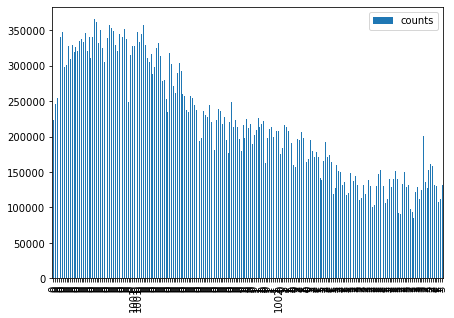

In [112]:
corona_plt.plot(kind = 'bar', figsize=(7,5))

<AxesSubplot:>

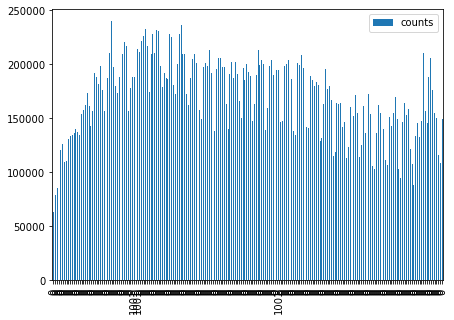

In [113]:
cov_plt.plot(kind = 'bar', figsize=(7,5))

<AxesSubplot:>

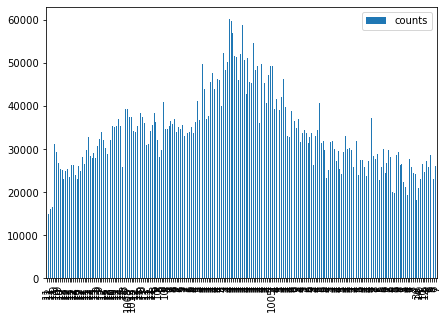

In [114]:
case_plt.plot(kind = 'bar', figsize=(7,5))

In [91]:
hospital_data = pd.read_csv('./covid-hospitalizations.csv')

In [95]:
hospital_data.shape

(189876, 5)

In [96]:
hospital_data.isnull().sum()

entity       0
iso_code     0
date         0
indicator    0
value        0
dtype: int64

In [93]:
hospital_data.head()

,entity,iso_code,date,indicator,value
0,Algeria,DZA,2020-07-17,Daily ICU occupancy,62.000
1,Algeria,DZA,2020-07-17,Daily ICU occupancy per million,1.381
2,Algeria,DZA,2020-07-18,Daily ICU occupancy,67.000
3,Algeria,DZA,2020-07-18,Daily ICU occupancy per million,1.492
4,Algeria,DZA,2020-07-20,Daily ICU occupancy,64.000


In [94]:
hosp_s = spark.createDataFrame(hospital_data)

In [100]:
hosp_s.select('entity').distinct().collect()

[Row(entity='Russia'),
 Row(entity='Sweden'),
 Row(entity='Malaysia'),
 Row(entity='Singapore'),
 Row(entity='Germany'),
 Row(entity='France'),
 Row(entity='Greece'),
 Row(entity='Algeria'),
 Row(entity='Slovakia'),
 Row(entity='Argentina'),
 Row(entity='Wales'),
 Row(entity='Belgium'),
 Row(entity='Finland'),
 Row(entity='United States'),
 Row(entity='Malta'),
 Row(entity='Chile'),
 Row(entity='Croatia'),
 Row(entity='Bolivia'),
 Row(entity='Italy'),
 Row(entity='Lithuania'),
 Row(entity='Norway'),
 Row(entity='Spain'),
 Row(entity='Czechia'),
 Row(entity='Denmark'),
 Row(entity='Ireland'),
 Row(entity='Liechtenstein'),
 Row(entity='Iceland'),
 Row(entity='Israel'),
 Row(entity='South Korea'),
 Row(entity='Cyprus'),
 Row(entity='Estonia'),
 Row(entity='Switzerland'),
 Row(entity='Latvia'),
 Row(entity='Canada'),
 Row(entity='Slovenia'),
 Row(entity='Japan'),
 Row(entity='Luxembourg'),
 Row(entity='England'),
 Row(entity='Poland'),
 Row(entity='Portugal'),
 Row(entity='Australia'),
 Ro

In [101]:
hosp_s.select('entity').distinct().count()

51

In [104]:
hosp_s.agg({"date": "max"}).show()

+----------+
| max(date)|
+----------+
|2023-03-19|
+----------+



In [105]:
hosp_s.agg({"date": "min"}).show()

+----------+
| min(date)|
+----------+
|2020-01-06|
+----------+



In [106]:
avr_h = pd.read_csv('avr_hosp_data.csv')

In [107]:
avr_h.head()

,date,Daily ICU occupancy,Daily ICU occupancy per million,Daily hospital occupancy,Daily hospital occupancy per million,Weekly new ICU admissions,Weekly new ICU admissions per million,Weekly new hospital admissions,Weekly new hospital admissions per million
0,2020-03-22,395.642857,9.803571,2095.470588,60.377412,19.100000,5.161300,1433.058824,61.196824
1,2020-03-23,421.200000,10.615133,2452.250000,70.254000,24.500000,2.435000,2723.555556,89.693667
2,2020-03-24,457.000000,11.916187,2605.117647,79.312588,27.000000,2.683500,2807.666667,96.497444
3,2020-03-25,484.235294,14.613588,2752.388889,89.129833,993.333333,16.531333,4342.272727,117.426364
4,2020-03-26,525.000000,16.382765,3034.500000,97.037444,1053.333333,17.580667,4555.454545,126.868545


In [108]:
icu = avr_h[['date', 'Daily ICU occupancy']]

<AxesSubplot:>

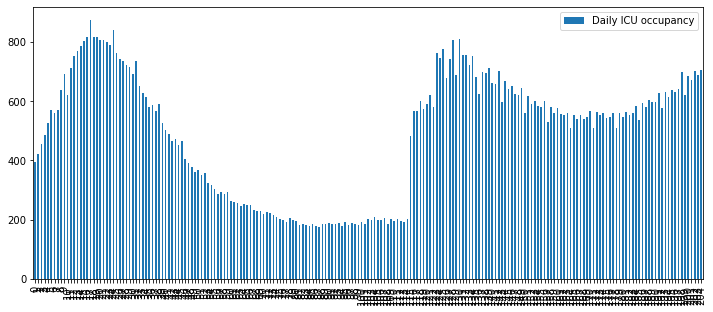

In [109]:
icu.plot(kind = 'bar', figsize=(12,5))

In [110]:
hosp = avr_h[['date', 'Daily hospital occupancy']]

<AxesSubplot:>

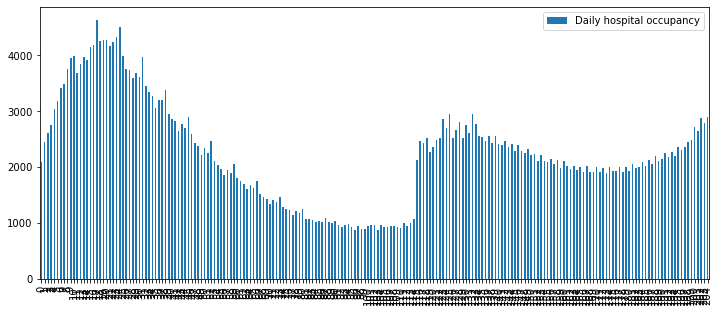

In [111]:
hosp.plot(kind = 'bar', figsize=(12,5))